In [149]:
import cv2
import random
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [150]:
print(cv2.__version__)

4.2.0


In [151]:
images_dir = "C:\\Users\RAKESH KANNAN\Downloads\Compressed\invictus-master\data\images"
image_files = os.listdir(images_dir)

In [152]:
image_path = "{}/{}".format(images_dir, "car_3.jpg")

In [153]:
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [154]:
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

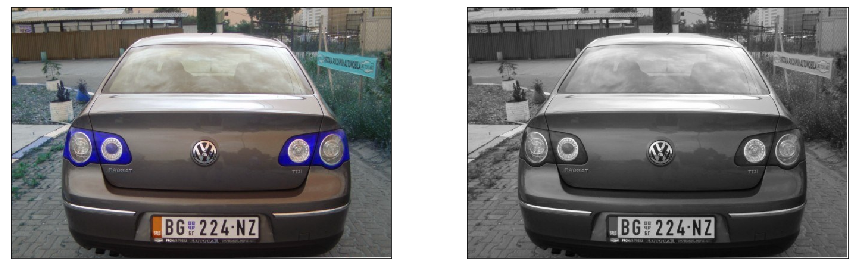

In [155]:
plot_images(image, gray)


In [156]:
blur = cv2.bilateralFilter(gray, 11,90, 90)


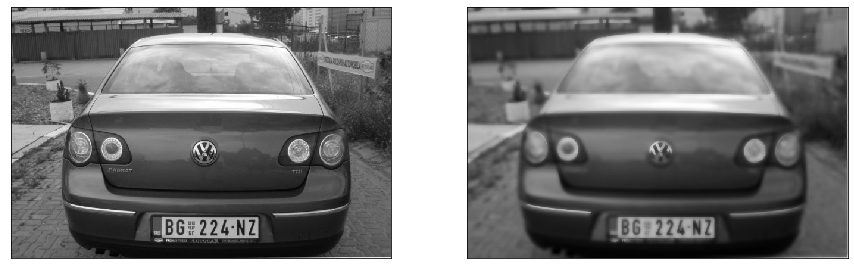

In [157]:
plot_images(gray, blur)


In [158]:
edges = cv2.Canny(blur, 30, 200)

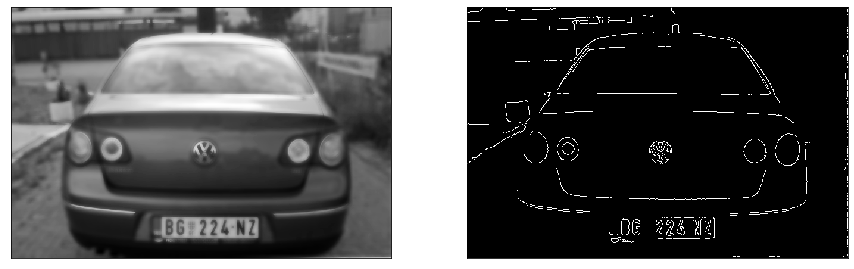

In [159]:
plot_images(blur, edges)


In [160]:
cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [161]:
image_copy = image.copy()

In [162]:
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

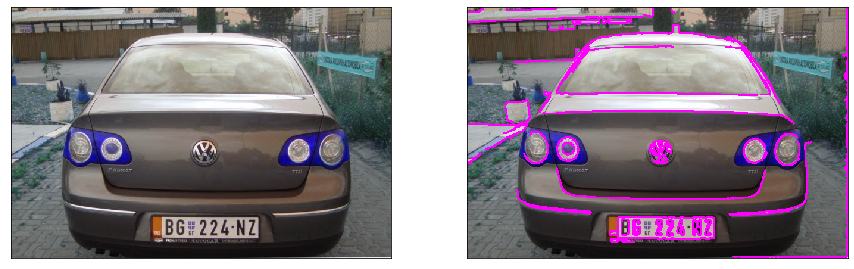

In [163]:
plot_images(image, image_copy)

In [164]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]

In [165]:
image_copy = image.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

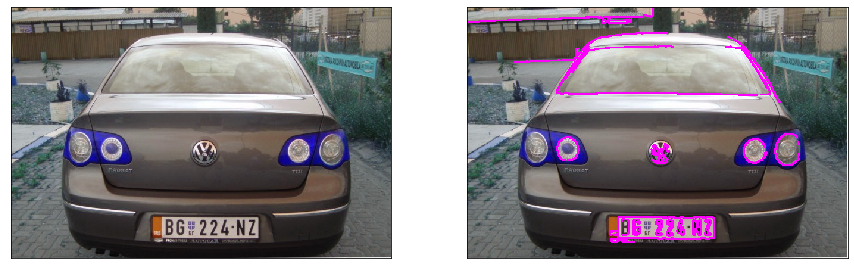

In [166]:
plot_images(image, image_copy)

In [167]:
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate1 = image[y:y+h, x:x+w]
        break

cv2.imwrite("plate1.png", plate1)

True

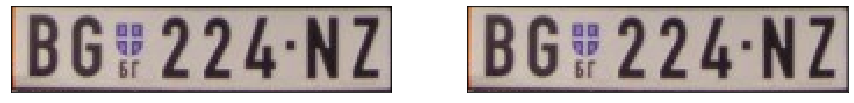

In [168]:
plot_images(plate1, plate1)

In [169]:
import pytesseract
import time
import pandas as pd
from PIL import Image

In [170]:
pytesseract.pytesseract.tesseract_cmd = (r"C:\Program Files\Tesseract-OCR\tesseract.exe")

In [171]:
text=pytesseract.image_to_string(plate1,lang='eng')

In [172]:
raw_data = {'date': [time.asctime( time.localtime(time.time()) )],'vechile_number': [text]}

In [173]:
print(text)

BG#224:NZ


In [174]:
df = pd.DataFrame(raw_data, columns = ['date', 'vechile_number'])
df.to_csv('melon3.csv')